# iris_data

## Import all libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, roc_curve, multilabel_confusion_matrix

from imblearn.over_sampling import RandomOverSampler, SMOTE

import pickle as pkl
import json

# Problem Statement

#  Data Gathering

In [2]:
df=pd.read_csv('iris.csv',index_col = 'Id')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


# Exploratory Data Analaysis (EDA) 

In [3]:
x= df.drop('Species',axis=1)
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [4]:
y=df['Species']
y.head(5)

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

####  Here is no null values in Dataset.

### Now checking outliers using boxplot

## SepalLengthCm

<AxesSubplot:>

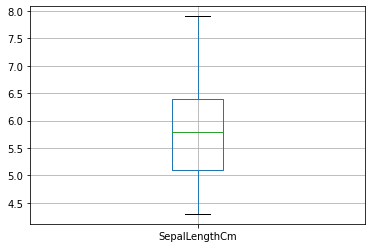

In [8]:
df[['SepalLengthCm']].boxplot()

## SepalWidthCm

<AxesSubplot:>

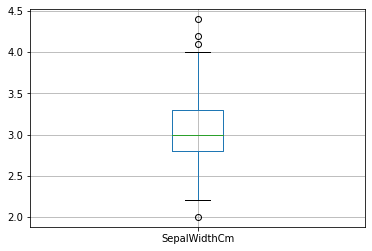

In [9]:
df[['SepalWidthCm']].boxplot()

##  PetalLengthCm

<AxesSubplot:>

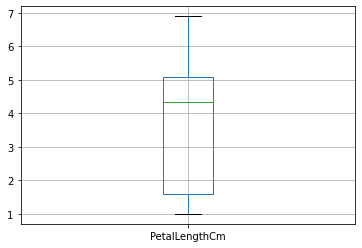

In [10]:
df[['PetalLengthCm']].boxplot()

 ## PetalWidthCm

<AxesSubplot:>

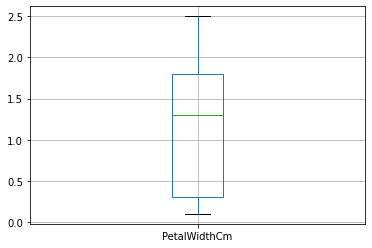

In [11]:
df[['PetalWidthCm']].boxplot()

In [12]:
q1 = df['SepalWidthCm'].quantile(0.25)
q2 = df['SepalWidthCm'].quantile(0.50)
q3 = df['SepalWidthCm'].quantile(0.75)
median =  df['SepalWidthCm'].median()
print("Q1 :",q1)
print("Q2 :",q2)
print("Q3 :",q3)
print("median :",median)

iqr = q3 - q1

upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr
print("Upper Tail :",upper_tail)
print("Lower Tail :",lower_tail)

Q1 : 2.8
Q2 : 3.0
Q3 : 3.3
median : 3.0
Upper Tail : 4.05
Lower Tail : 2.05


In [13]:
df[['SepalWidthCm']].loc[df['SepalWidthCm'] > upper_tail]

,SepalWidthCm
Id,
16,4.4
33,4.1
34,4.2


In [14]:
df[['SepalWidthCm']].loc[df['SepalWidthCm'] < lower_tail]

,SepalWidthCm
Id,
61,2.0


In [15]:
median1=df.loc[(df['SepalWidthCm']<=upper_tail) & (df['SepalWidthCm']>=lower_tail),'SepalWidthCm'].median()
median1

3.0

In [16]:
df.loc[(df['SepalWidthCm']>=upper_tail)  | (df['SepalWidthCm']<=lower_tail),'SepalWidthCm']=median1

<AxesSubplot:xlabel='SepalWidthCm'>

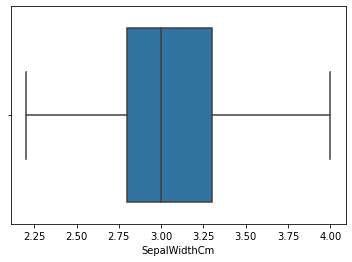

In [17]:
#df[['SepalWidthCm']].boxplot()
sns.boxplot(x=df['SepalWidthCm'])

In [18]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Train Test Split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10,stratify = y)

In [20]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
124,6.3,2.7,4.9,1.8
93,5.8,2.6,4.0,1.2
61,5.0,2.0,3.5,1.0
12,4.8,3.4,1.6,0.2
122,5.6,2.8,4.9,2.0
...,...,...,...,...
115,5.8,2.8,5.1,2.4
15,5.8,4.0,1.2,0.2
129,6.4,2.8,5.6,2.1


In [21]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
56,5.7,2.8,4.5,1.3
44,5.0,3.5,1.6,0.6
85,5.4,3.0,4.5,1.5
127,6.2,2.8,4.8,1.8
58,4.9,2.4,3.3,1.0
147,6.3,2.5,5.0,1.9
9,4.4,2.9,1.4,0.2
143,5.8,2.7,5.1,1.9
149,6.2,3.4,5.4,2.3


In [22]:
y_test

Id
56     Iris-versicolor
44         Iris-setosa
85     Iris-versicolor
127     Iris-virginica
58     Iris-versicolor
147     Iris-virginica
9          Iris-setosa
143     Iris-virginica
149     Iris-virginica
16         Iris-setosa
29         Iris-setosa
55     Iris-versicolor
126     Iris-virginica
117     Iris-virginica
94     Iris-versicolor
1          Iris-setosa
30         Iris-setosa
99     Iris-versicolor
118     Iris-virginica
37         Iris-setosa
133     Iris-virginica
142     Iris-virginica
144     Iris-virginica
50         Iris-setosa
26         Iris-setosa
91     Iris-versicolor
95     Iris-versicolor
10         Iris-setosa
83     Iris-versicolor
75     Iris-versicolor
Name: Species, dtype: object

In [23]:
y_train

Id
124     Iris-virginica
93     Iris-versicolor
61     Iris-versicolor
12         Iris-setosa
122     Iris-virginica
            ...       
115     Iris-virginica
15         Iris-setosa
129     Iris-virginica
20         Iris-setosa
62     Iris-versicolor
Name: Species, Length: 120, dtype: object

# Model training and Evalution

# 1. Logistic Regression

In [24]:
logistic_model=LogisticRegression(multi_class= 'ovr')
logistic_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [25]:
# train Data

y_pred = logistic_model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print('*' * 50)

multilabel_cnf_mat = multilabel_confusion_matrix(y_train,y_pred)
print("MultiLabel Confusion Matrix :\n",multilabel_cnf_mat)
print("*"*50)

logistic_train_accuracy = accuracy_score(y_train, y_pred)
print("Accuracy :",logistic_train_accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[40  0  0]
 [ 0 35  5]
 [ 0  2 38]]
**************************************************
MultiLabel Confusion Matrix :
 [[[80  0]
  [ 0 40]]

 [[78  2]
  [ 5 35]]

 [[75  5]
  [ 2 38]]]
**************************************************
Accuracy : 0.9416666666666667
**************************************************
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.95      0.88      0.91        40
 Iris-virginica       0.88      0.95      0.92        40

       accuracy                           0.94       120
      macro avg       0.94      0.94      0.94       120
   weighted avg       0.94      0.94      0.94       120



In [26]:
# Test Data

y_pred=logistic_model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

logistic_test_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :",logistic_test_accuracy)

clf_report=classification_report(y_test,y_pred)
print("Classificaton Report :\n",clf_report)

Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Accuracy : 1.0
Classificaton Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Plot_confusion_matrix

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


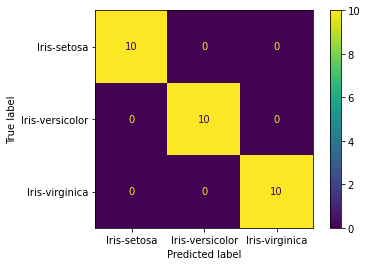

In [27]:
plot_confusion_matrix(logistic_model,x_test, y_test)

# 2. KNN Algorithm

In [28]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

## Evaluation

In [29]:
# Train Data
y_pred = knn_model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

knn_train_accuracy=accuracy_score(y_train,y_pred)
print("Accuracy :",knn_train_accuracy)

clf_report = classification_report(y_train,y_pred)
print("Classification Report :\n",clf_report)



Confusion Matrix :
 [[40  0  0]
 [ 0 37  3]
 [ 0  2 38]]
Accuracy : 0.9583333333333334
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.95      0.93      0.94        40
 Iris-virginica       0.93      0.95      0.94        40

       accuracy                           0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120



In [30]:
# Test Data

y_pred =knn_model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

knn_test_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :",knn_test_accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Accuracy : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


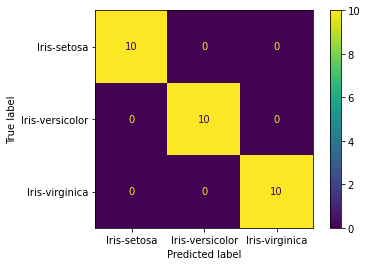

In [31]:
plot_confusion_matrix(knn_model,x_test,y_test)

## Hyperparameter Tunning

In [32]:
knn_model =KNeighborsClassifier()

parameter = { 'n_neighbors' : np.arange(3,30),
             'p' : [1,2]}

gscv_knn_model = GridSearchCV (knn_model,parameter,cv =5)
gscv_knn_model.fit(x_train, y_train)
knn_model = gscv_knn_model.best_estimator_
knn_model

KNeighborsClassifier(n_neighbors=15, p=1)

In [33]:
# Train Data
y_pred = knn_model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

knn_train_accuracy_HYP=accuracy_score(y_train,y_pred)
print("Accuracy :",knn_train_accuracy_HYP)

clf_report = classification_report(y_train,y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[40  0  0]
 [ 0 38  2]
 [ 0  3 37]]
Accuracy : 0.9583333333333334
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.95      0.94        40
 Iris-virginica       0.95      0.93      0.94        40

       accuracy                           0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120



In [34]:
# Test Data

y_pred =knn_model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

knn_test_accuracy_HYP=accuracy_score(y_test,y_pred)
print("Accuracy :",knn_test_accuracy_HYP)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Accuracy : 0.9666666666666667
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Decision Tree

In [35]:
dt_model=DecisionTreeClassifier( random_state=10)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [36]:
# Train Data
y_pred = dt_model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

dt_train_accuracy=accuracy_score(y_train,y_pred)
print("Accuracy :",dt_train_accuracy)

clf_report = classification_report(y_train,y_pred)
print("Classification Report :\n",clf_report)



Confusion Matrix :
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
Accuracy : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



In [37]:
# Test Data
y_pred = dt_model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

dt_test_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :",dt_test_accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)



Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Accuracy : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


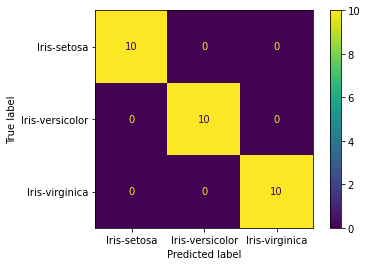

In [38]:
plot_confusion_matrix(dt_model,x_test,y_test)

In [39]:
plt.figure(figsize=(200,150))

plot_tree(dt_model,feature_names=x.columns,class_names=['setosa','versicolor','virginica'],filled=True)
plt.savefig('Decision_Tree_WithoutHYP.png')

# Random Forest

In [40]:
rf_model=RandomForestClassifier(random_state = 10)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [41]:
# Train Data

y_pred = rf_model.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

rf_train_accuracy=accuracy_score(y_train,y_pred)
print("Accuracy :",rf_train_accuracy)

clf_report = classification_report(y_train,y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]
Accuracy : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        40

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120



In [42]:
# Test Data

y_pred = rf_model.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cnf_matrix)

rf_test_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy :",rf_test_accuracy)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Accuracy : 1.0
Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


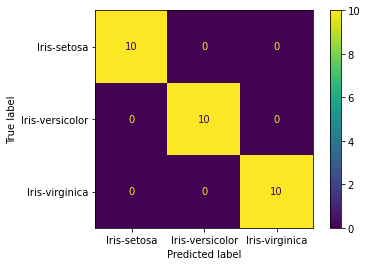

In [43]:
plot_confusion_matrix(rf_model,x_test,y_test)

In [58]:
print('logistic_train_accuracy:', logistic_train_accuracy)
print('logistic_test_accuracy:' ,logistic_test_accuracy)
print()
print('knn_train_accuracy :',knn_train_accuracy)
print('knn_test_accuracy :',knn_test_accuracy)
print()

print('knn_train_accuracy_HYP :',knn_train_accuracy_HYP)
print('knn_test_accuracy_HYP :',knn_test_accuracy_HYP)
print()
print('dt_train_accuracy :',dt_train_accuracy)
print('dt_test_accuracy :',dt_test_accuracy)
print()
print('rf_train_accuracy :',rf_train_accuracy)
print('rf_test_accuracy :',rf_test_accuracy)

logistic_train_accuracy: 0.9416666666666667
logistic_test_accuracy: 1.0

knn_train_accuracy : 0.9583333333333334
knn_test_accuracy : 1.0

knn_train_accuracy_HYP : 0.9583333333333334
knn_test_accuracy_HYP : 0.9666666666666667

dt_train_accuracy : 1.0
dt_test_accuracy : 1.0

rf_train_accuracy : 1.0
rf_test_accuracy : 1.0


### Here Decision Tree and Random Forest gives a best Result

# Prediction

In [59]:
df.head(2).T

Id,1,2
SepalLengthCm,5.1,4.9
SepalWidthCm,3.5,3.0
PetalLengthCm,1.4,1.4
PetalWidthCm,0.2,0.2
Species,Iris-setosa,Iris-setosa


In [62]:
SepalLengthCm =   4.1
SepalWidthCm =  3.9
PetalLengthCm =  5.1
PetalWidthCm =  2.0

test_array = np.array([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])
test_array
predicted_class = logistic_model.predict(test_array)[0]
predicted_class

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Iris-virginica'

In [64]:
SepalLengthCm =   4.4
SepalWidthCm =  2.9
PetalLengthCm =  1.4
PetalWidthCm =  0.2

test_array = np.array([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])
test_array
predicted_class = dt_model.predict(test_array)[0]
predicted_class

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'Iris-setosa'

In [65]:
SepalLengthCm =   6.1
SepalWidthCm =  2.9
PetalLengthCm =  4.7
PetalWidthCm =  1.4

test_array = np.array([[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]])
test_array
predicted_class = rf_model.predict(test_array)[0]
predicted_class

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'Iris-versicolor'